# 타이타닉 데이터 EDA

## EDA란?
Exploratory data analysis(탐색적 데이터 분석)으로 주어진 데이터를 다양한 방법으로 정보를 찾아내는 데이터 분석 방법  
모델링 이전 데이터를 확인하고 흟어보면서 데이터에 대한 이해를 목적으로 시행되며 이를 바탕으로 정교한 모델링을 수행 할 수 있다.

## titanic 데이터 설명
타이타닉호에 승선했던 탑승자 정보를 담고 있는 데이터이다. 데이터분석 필드에서는 교육용 및 입문용 데이터로 오랫동안 사랑받아 온 데이터이며  
탑승자 정보를 바탕으로 이 탑승자가 생존했는지 혹은 사망했는지 분류하는 모델링을 목적으로 제작 된 데이터입니다.  

**columns 정보**
- pclass : 객실 등급
- survived : 생존 유무
- name : 칭호를 포함한 이름
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- ticket : 탑승권 종류 (각 숫자가 의미하는 바는 데이터를 통해 알 수 있는 것이 없을 수 있습니다.)
- fare : 지불한 운임
- cabin : 객실정보
- embarked : 선착장정보
- boat : 탈출한 보트가 있다면 boat 번호
- body : 사망자의 시신 수습 후 부여한 일련번호
- home : 출신

## EDA 진행 예시

### 타이타닉 탑승자 데이터 불러오기

In [1]:
# 필요모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
# 데이터 로딩 및 확인
df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
df = df.drop(df[df['fare'].isnull()].index,axis=0) # fare 결측치 제거

In [ ]:
df['embarked'].fillna("S",inplace=True) # embarked 결측치를 중위값으로 대체
df = df.drop(columns=['cabin','body','boat','home.dest']) # 필요없는 column 제거

In [ ]:
df['age'].fillna(28,inplace=True) # age 결측치 중위값으로 대체

In [ ]:
# 데이터 종류 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1308 non-null   int64  
 1   survived  1308 non-null   int64  
 2   name      1308 non-null   object 
 3   sex       1308 non-null   object 
 4   age       1308 non-null   float64
 5   sibsp     1308 non-null   int64  
 6   parch     1308 non-null   int64  
 7   ticket    1308 non-null   object 
 8   fare      1308 non-null   float64
 9   embarked  1308 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 112.4+ KB


각 작업을 거친 후 데이터에 대한 리포트 혹은 시각화를 통해 얻을 수 있는 정보를 기술 해봅니다.  
위의 정보를 바탕으로 1309개의 샘플이 존재하지만 몇몇 개의 컬럼에는 결측치(비어있는 값)이 있음을 확인 할 수 있습니다

In [ ]:
# 기초통계량 확인
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,2.294343,0.382263,29.479488,0.499235,0.385321,33.295479
std,0.837929,0.486126,12.881653,1.041965,0.865826,51.758668
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


전체 탑승객의 생존률, 평균 연령 정도가 우리가 확인하고 추후 생각해보아야 할 데이터 같습니다.

# 검증 및 가설 요소(데이터 분석 전)
### • 성별과 나이 별 생존률
### • 동반자의 수와 생존률의 관계
### • 나이의 분포와 생존률의 관계(아주 낮음,아주 높음) 
#### // 약자는 사회에서 배려받는 경향이 있기 때문
### • 요금과 좌석의 관계(+좌석과 생존률의 관계)
#### // 비싼요금(높은등급)일수록 국가 기관 또는 기업의 높은 위치에 있어서 탈출의 우선권을 얻기 수월할 수도 있다고 판단

## 샘플링으로 데이터 살펴보기
판다스 수업시간에 진행했던 팬시 인덱싱을 사용하여 다양한 가정을 통한 데이터를 살펴보겠습니다.  
전체 탑승객의 생존률은 38% 정도였지만 1등급 객실에 승선한 여성의 경우의 생존률을 알아보겠습니다.

In [ ]:
df[(df['pclass']==1) & (df['sex']=='female') & (df['survived']==1)]['survived'].value_counts()

1    139
Name: survived, dtype: int64

### 시각화로 데이터 살펴보기

#### 전체 탑승자 연령대 시각화

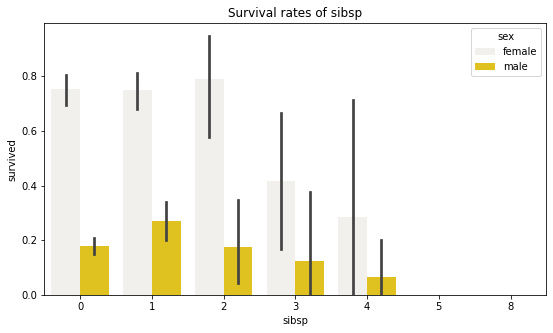

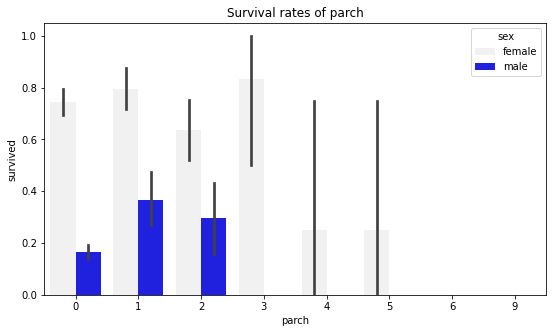

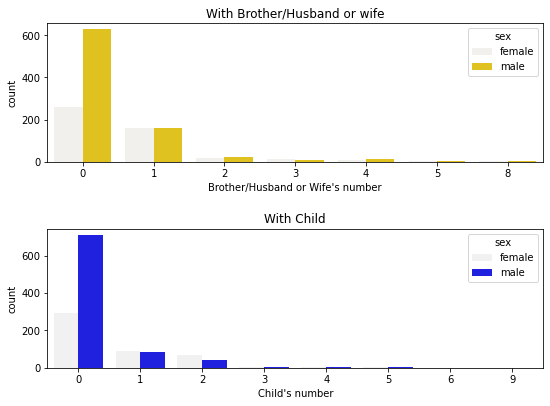

In [ ]:
plt.figure(figsize=(9,5))
plt.title('Survival rates of sibsp')
sns.barplot(data=df,x='sibsp',y='survived',hue='sex',color='gold')
plt.show()
plt.figure(figsize=(9,5))
plt.title('Survival rates of parch')
sns.barplot(data = df,x='parch',y='survived',hue=df['sex'],color='blue')
plt.show() # 

# ---------- 형제/배우자와 함께 온 사람 수 , 자녀와 함께 온 사람 수의 도표 ----------
plt.figure(figsize=(8,6))
plt.subplot(211)
plt.title('With Brother/Husband or wife')
sns.countplot(data=df,x='sibsp',hue='sex',color='gold') # 형제/배우자와 함께온 사람 수(성별 분리)
plt.xlabel("Brother/Husband or Wife's number")
plt.subplot(212)
plt.title('With Child')
sns.countplot(data=df,x='parch',hue='sex',color='blue') # 자녀와 함께온 사람 수(성별 분리)
plt.xlabel("Child's number")
plt.tight_layout(pad=2)
plt.show()
### 결론 ###
# 혼자 온 남성의 수가 제일 많지만 생존율이 매우 낮음
# 여성 중 2명 이하의 형제/부부의 여성인 생존률이 매우 높음
# 여성 중에서 2자녀 이하의 여성의 생존률이 매우 높음 (3자녀 부터 표본의 수가 매우 낮음)

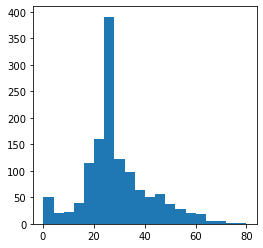

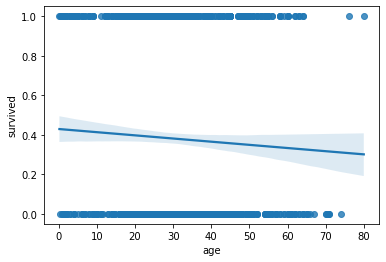

In [ ]:
df['age'].hist(bins=20,figsize=(4,4),grid=False)
plt.show()
sns.regplot(data=df,x='age',y='survived') # 나이와 생존률의 관계
plt.show()
# 나이가 많을수록 평균 생존률이 낮아지는 경향을 보임

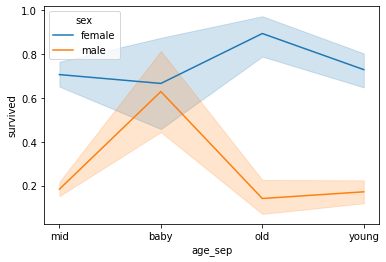

남성 유아의 생존률 :  0.6470588235294118
여성 노인의 생존률 :  0.90625


In [ ]:
def age_sep(x):
    if x < 5:
        return 'baby'
    elif x < 25:
        return 'young'
    elif x < 50:
        return 'mid'
    else:
        return 'old'

df['age_sep'] =df['age'].astype(int).sort_values().apply(age_sep) # 나이 별 구간 분류
sns.lineplot(data=df,x='age_sep',y='survived',hue='sex')
plt.show() 
print('남성 유아의 생존률 : ',df[df['age'] < 5]['survived'].mean())
print('여성 노인의 생존률 : ',df[(df['age'] > 50)&(df['sex']=='female')]['survived'].mean())
# 남성은 5세 미만인 인원들만 생존률이 상대적으로 높다.
# 성별과 나이로 분류하였을 때 남성은 영유아만 생존률이 높지만 여성의 경우 노인의 생존률이 가장 높다.

### 객실 등급별 생존률
판다스 수업시간에 진행하지는 않았지만 각 데이터의 범주에 따라 데이터를 분류하는 groupby 함수의 예시를 사용해보겠습니다.

In [ ]:
df.groupby('pclass').mean()

,survived,age,sibsp,parch,fare
pclass,,,,,
1,0.619195,37.812446,0.436533,0.365325,87.508992
2,0.429603,29.419675,0.393502,0.368231,21.179196
3,0.255650,25.701271,0.569209,0.401130,13.302889


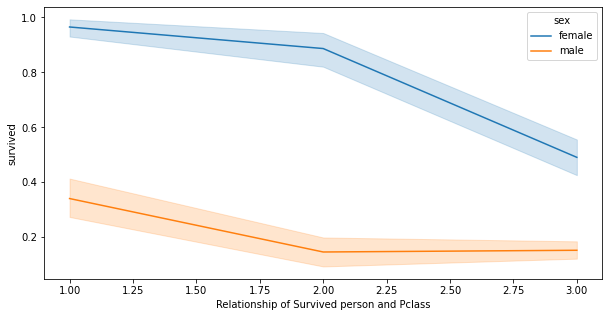

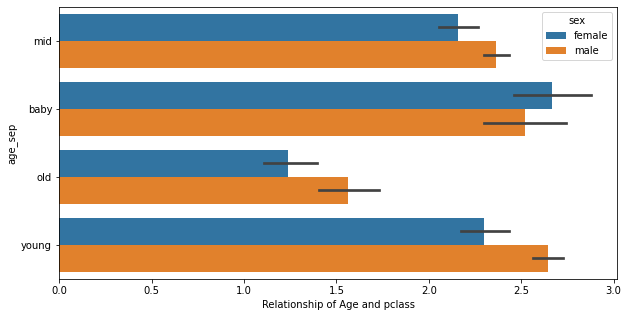

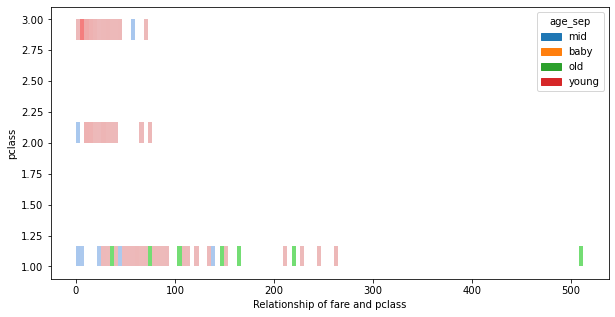

100달러 이상 지불, 1등급 탑승 95
100달러 미만 지불, 1등급 탑승 228
100달러 미만 지불, 2등급 탑승 277
100달러 미만 지불, 3등급 탑승 708


In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='pclass',y='survived',hue='sex')
plt.xlabel('Relationship of Survived person and Pclass')
plt.show()
# 객실 등급이 1등급에 가까울수록 생존률이 높아진다.
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='pclass',y="age_sep",hue="sex")
plt.xlabel('Relationship of Age and pclass')
plt.show()
# 대다수 노인들은 1등급에 탑승하였고 나이가 젊어질수록 3등급에 가까워진다. (mid는 1등급에 가장많고 2,3에 골고루 분포)
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='fare',y='pclass',hue='age_sep')
plt.xlabel('Relationship of fare and pclass')
plt.show()
# 90달러 이상 지불 시 항상 1등급 좌석이고 1등급 좌석에는 대부분의 노인들이 많이 분포해 있다.
print('100달러 이상 지불, 1등급 탑승',len(df[(df['fare'] >= 90)&(df['pclass']== 1)]))
print('100달러 미만 지불, 1등급 탑승',len(df[(df['fare'] < 90)&(df['pclass']== 1)]))
print('100달러 미만 지불, 2등급 탑승',len(df[(df['fare'] < 90)&(df['pclass']== 2)]))
print('100달러 미만 지불, 3등급 탑승',len(df[(df['fare'] < 90)&(df['pclass']== 3)]))

## 전체 생존률

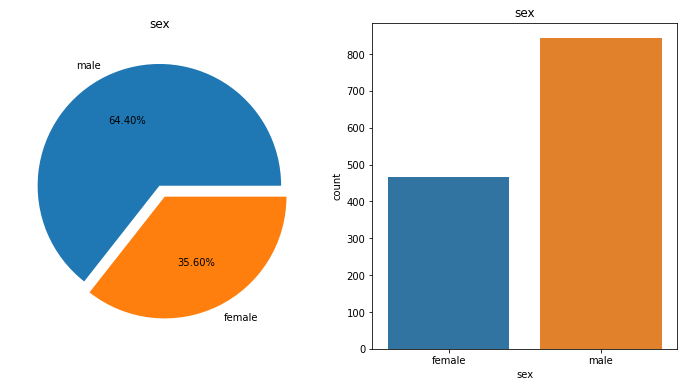

In [ ]:
fig = plt.figure(figsize=(12,6))
graph1 = fig.add_subplot(1,2,1)
df['sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=graph1)
graph1.set_title('sex')
graph1.set_ylabel('')
graph2 = fig.add_subplot(1,2,2)
sns.countplot('sex',data=df,ax=graph2)
graph2.set_title('sex')
plt.show(fig)

## 성별에 따른 생존자 분류

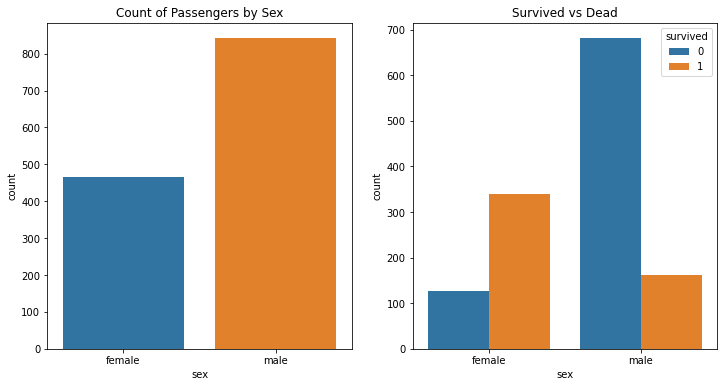

In [ ]:
fig = plt.figure(figsize=(12,6),)
graph1 = fig.add_subplot(1,2,1)
graph2 = fig.add_subplot(1,2,2)
  
sns.countplot(data=df,x='sex',ax=graph1)
graph1.set_title('Count of Passengers by Sex')

sns.countplot(data=df,x='sex',hue='survived', ax=graph2)
graph2.set_title('Survived vs Dead')
plt.show()

## 연령, 성별, 객실등급 한꺼번에

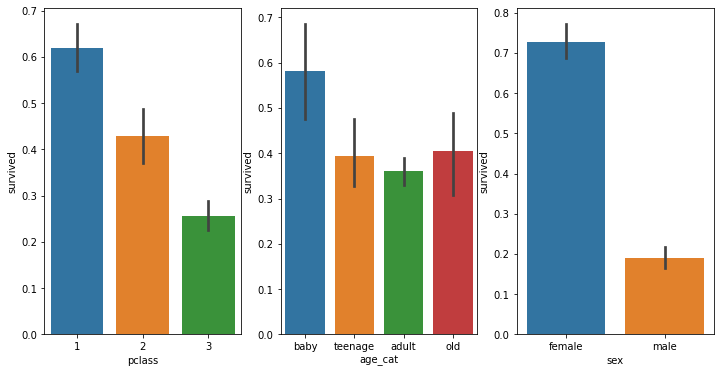

In [ ]:
df['age_cat'] = pd.cut(df['age'], bins=[0, 10, 20, 50, 100], 
                             include_lowest=True, labels=['baby', 'teenage', 'adult', 'old'])
fig = plt.figure(figsize=(12,6))
graph1 = fig.add_subplot(1,3,1)
graph2 = fig.add_subplot(1,3,2)
graph3 = fig.add_subplot(1,3,3)

sns.barplot(data=df,x='pclass',y='survived',ax=graph1)
sns.barplot(data=df,x='age_cat',y='survived',ax=graph2)
sns.barplot(data=df,x='sex',y='survived', ax=graph3)
plt.show()

## 연령대별 분포 생존자, 사망자 비교

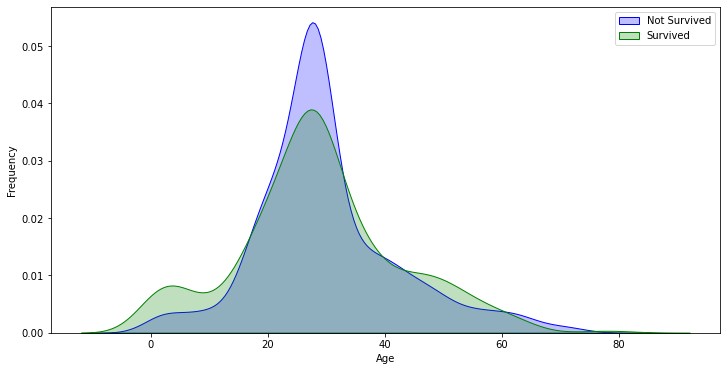

In [ ]:
fig = plt.figure(figsize=(12,6))
graph1 = fig.add_subplot(1,1,1)
sns.kdeplot(df["age"][(df["survived"] == 0) & (df["age"].notnull())], 
                ax = graph1, color="Blue", shade = True)
sns.kdeplot(df["age"][(df["survived"] == 1) & (df["age"].notnull())], 
                ax =graph1, color="Green", shade= True)
graph1.set_xlabel("Age")
graph1.set_ylabel("Frequency")
graph1.legend(["Not Survived","Survived"])
plt.show()

# 데이터 분석 결과
## • 성별과 나이 별 생존률
#### - 성별은 전체적으로 여성의 경우 남성보다 생존률이 높은 것을 확인할 수 있었다.

## • 동반자의 수와 생존률의 관계(형제/부부/자녀 등)
#### - 동반자(형제/부부/자녀) 수가 많으면 많을수록 생존률이 떨어지는 경향이 있었으나 표본이 상대적으로 적었음
#### - 동반자의 수가 없는 경우(혼자) 생존률이 높을 줄 알았으나 남성의 경우 동반자가 없을 때 1~2명 있을때보다 생존률이 상대적으로 낮은것을 보여주었고 여성의 경우 동반자2명 이하일 때 평균적으로 가장 높은 생존률을 보여주고 있었음

## • 나이와 생존률의 관계
#### - 생존률이 전체적으로 높은 여성의 범주에서는 영유아(5세 미만)일때 가장 낮고 노인(50세 이상)의 경우에 생존률이 가장 높았음. 
#### - 남성은 전체적으로 생존률이 여성보다 낮았지만 영유아의 범주에서는 다른 나잇대보다 상대적으로 높은 생존률을 보여주고 있음.

## • 요금과 좌석의 관계(+좌석과 생존률의 관계)
#### - 90달러 이상의 요금을 지불하면 1등급 좌석을 확정적으로 탈 수 있었고 1등급 좌석에서는 노인의 비율이 가장 높았음 (고액을 지불하면 확정적으로 1등급 좌석에 탑승이 가능)
#### - 연령대별로 좌석등급을 알아봤을 때 1등급에는 mid-age 및 old 범위의 인원이 많았음.
#### - 좌석의 등급 별로 생존률을 확인했을 때 1등급에 가까울수록 생존률이 올라가는 경향이 있었으나 성별에 따라 2등급과 3등급의 생존률은 다른 경향을 보였음 (남성 중 생존률이 높은 영유아는 3등급 좌석에 많이 분포하고 있음)